<div style="display:block">
    <div style="width: 20%; display: inline-block; text-align: left;">
        <img src="http://upload.wikimedia.org/wikipedia/en/0/0c/Mu_Sigma_Logo.jpg" style="height:75px; margin-left:0px" />
    </div>
    <div style="width: 59%; display: inline-block">
        <h1  style="text-align: center">ML using Python: Session 2</h1>
        <div style="width: 100%; text-align: center; display: inline-block;"><i>Author:</i> <strong>Srishti Saha</strong> </div>
    </div>
    <div style="width: 20%; text-align: right; display: inline-block;">
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Created: </i>
            <time datetime="2014-03-10" pubdate>9th February 2019</time>
        </div>
    </div>
</div>

# Topics Covered:


## 1. Data Imputation
find link here: [Data Imputation](#Data-Imputation)

## 2. Feature Scaling
find link here: [Feature Scaling](#Feature-Scaling)

## 3. Fundamental steps before building an ML model
find link here: [Fundamental Data Preprocessing](#Fundamental-Data-Preprocessing)

## 4. Handling Categorical Features
find link here: [Treatment of categorical and ordinal variables](#Treatment-of-categorical-and-ordinal-variables)

## 5. Dealing with imbalanced data
find link here: [Dealing with imbalanced data](#Dealing-with-imbalanced-data)

In [13]:
import pandas as pd
import numpy as np

## Data Imputation

Missing values can be of three general types:

**Missing Completely At Random (MCAR)**: When missing data are MCAR, the presence/absence of data is completely independent of observable variables and parameters of interest. In this case, the analysis performed on the data are unbiased. In practice, it is highly unlikely.

**Missing At Random (MAR)**: When missing data is not random but can be totally related to a variable where there is complete information. This means that the nature of the missing data is related to the observed data but not the missing data. Using the above K12 study, missing data in this case is due to parents moving to a different city and hence, the children had to leave the study — missingness has nothing to do with the study. This kind of missing data can induce a bias in your analysis especially if it unbalances your data because of many missing values in a certain category.

**Missing Not At Random (MNAR)**: When the missing values are neither MCAR nor MAR. The missing values on the variable are related to that of both the observed and unobserved variables. An example of MNAR is that the parents are offended by the nature of the study and do not want their children to be bullied, so they withdrew kids from the study. The difficulty with MNAR data is intrinsically associated with the issue of identifiability.

### Different ways of treating missing data:

1. Remove columns with with large number of nulls
2. Impute with values like mean, median, a fixed value etc.
3. Imputation with a model (eg: Linear Regression model)
3. KNN imputation

There are multiple ways of doing so. You can read further at:
1. https://www.kaggle.com/residentmario/simple-techniques-for-missing-data-imputation
2. https://www.omicsonline.org/open-access/a-comparison-of-six-methods-for-missing-data-imputation-2155-6180-1000224.php?aid=54590


#### Removing nulls

A feature that has a high number of empty values is unlikely to be very useful for prediction. It can often be safely dropped. Dropping rare features simplifies your model, but obviously gives you fewer features to work with.

In [ ]:
feature_drop1= ['add relevant feature names here'] # eg: feature_drop1= ['GarageYrBlt','TotRmsAbvGrd']

#removing features mentioned in the list above
df.drop(feature_drop1,
              axis=1, inplace=True)
df.head()

#### Imputing with fixed values

You can replace missing values with the mean or median values of the dataset. This can be done at the level of the dataset or even within partitions. Sometimes the presence of nulls in a column represents some information. For instance, in a flag (column) where transactions have the value '1' indicating the presence of a promotion code applied and null otherwise indicates that the promotion wasn't applicable on the other. You can simply replace these nulls by 0.

In [1]:
###################################### Imputing with 0, 'NA, 'None' etc.###########################################
# columns with attributes where NaN indicate the absence of some flag characetristics.
attributes_with_na = ['']#list of features here

# replace 'NaN' with 'None' in these columns
for col in attributes_with_na:
    df[col].fillna('None',inplace=True) # depending on the nature of the column, choose the replacement value
    
###################################### Imputing with mean, median etc.(group statistic)###########################################   
# using group by and mean to impute null values
df['col1'] = df.groupby("group_by_col").col1.transform(lambda x: x.fillna(x.mean()))
# using group statistic at over all level
df['col2'].fillna((df['col2'].mean()), inplace = True)
# use mode for categorical variables: replaces nulls with most frequent observation:
df['feat_name'] = df['feat_name'].fillna(df['feat_name'].mode()[0])

#### Imputating missing values using a model
At times, some continuous variables are correlated to some other variables in the dataset. They are thus, a function of the other variables. In this case, use a model (eg: regression) to impute the missing values.

You can check for an example implementation in this Kaggle notebook:
https://www.kaggle.com/srishti280992/starter-code-eda-feature-engg-basic-model-v2

#### Imputation using KNN

KNN is applicable in any of the three situations of missing data (MCAR, MAR and MNAR), as long as there is a relationship between the variable with the missing value and the other variables.

KNN is an algorithm that is useful for matching a point with its closest k neighbors in a multi-dimensional space. It can be used for data that are continuous, discrete, ordinal and categorical which makes it particularly useful for dealing with all kind of missing data.

The assumption behind using KNN for missing values is that a point value can be approximated by the values of the points that are closest to it, based on other variables.

In [3]:
# 2 possible methods:

## download the .py script from: https://gist.github.com/YohanObadia/b310793cd22a4427faaadd9c381a5850
# import the methods from the script using simple import statements: from knn_impute import knn_impute
knn_impute(target=df['col0'], attributes=df.drop(['col1', 'col2'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming')

## use fancyimpute
from fancyimpute import KNN  
# df_with_missing_values has missing values
# Use 3 nearest rows which have a feature to fill in each row's missing features
df_filled = KNN(k=3).complete(df_with_missing_values)

Additional reading material:

1. for KNN imputation: https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637
2. https://www.kaggle.com/residentmario/simple-techniques-for-missing-data-imputation

## Feature Scaling

Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
Before we get into each of these techniques, let us get into the basic definitions and use-cases of these terms.

#### Data Scaling (also Rescaling)
This process helps you transform the data such that the features are within a specific range e.g. [0, 1] or [-1,1]. It is useful for the optimization algorithms, such as gradient descent, that are used within machine learning algorithms that weight inputs (e.g. regression and neural networks).

**When should you use it?**  
Rescaling is also used for algorithms that use *distance measurements* (for features with varied dimensions and units) for example K-Nearest-Neighbors (KNN).

#### Data Normalization
Normalization is done to change our observations so that they can be described as a normal distribution. Normal distribution (Gaussian distribution), also known as the bell curve, is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. For normalization, the maximum value You can get after applying the formula is 1, and the minimum value is 0. So all the values will be between 0 and 1.

**When should you use it?** 
You need to normalize you data before using a machine learning or statistics technique that assumes *normality* (that data is normally distributed) e.g. t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian Naive Bayes.

#### Data Standardization
Standardization is a form of data normalization. It transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

**When should you use it?** 
It is widely used in SVMs, logistic regression and neural networks.

Additional Reading Material:
1. https://www.kaggle.com/jfeng1023/data-cleaning-challenge-scale-and-normalize-data

### Min Max Scaling 

Min-max scaling is often known as feature scaling where the values of a numeric range of a variable are reduced to a scale between 0 and 1. Therefore, in order to calculate x' (scaled data), i.e. the scaled value of a member of the set of observed values of x (original dataset), we must employ the following formula:
![minmax](https://wiki.mu-sigma.com/muwiki/images/1/1d/Scaling.png)

Normally, this method scales the data within a range of [0,1]. However, if you want to scale it in some different range, you can do that too by applying this formula:

``X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min``

In [2]:
from sklearn import preprocessing

In [5]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = preprocessing.MinMaxScaler(feature_range=(2, 3))
print(scaler.fit(data))
print(scaler.transform(data))
print(scaler.transform([[2, 2]]))

MinMaxScaler(copy=True, feature_range=(2, 3))
[[2.   2.  ]
 [2.25 2.25]
 [2.5  2.5 ]
 [3.   3.  ]]
[[3.5 2. ]]


You can also use the *minmax_scaling* function from the mlxtend package

In [ ]:
from mlxtend.preprocessing import minmax_scaling

In [11]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=(range(6)))
s2 = pd.Series([10, 9, 8, 7, 6, 5], index=(range(6)))
df = pd.DataFrame(s1, columns=['s1'])
df['s2'] = s2

minmax_scaling(df, columns=['s1', 's2'])

### Scaling with respect to mean
Similar to the last technique, this method with also scale your data within a defined range. However, it will also help you center your data, i.e. make the mean 0.
The formula is:
![Centering](https://wiki.mu-sigma.com/muwiki/images/e/e2/Centering.png)

In [26]:
def centered_scaling(x):
    x_dash=[]
    for i in range(len(x)):
        xi_dash=(x[i]-np.mean(x))/(np.min(x)-np.max(x))
        x_dash.append(round(xi_dash,2))
    return(x_dash)    

a=[2,4,6,8,15]
centered_scaling(a)

[0.38, 0.23, 0.08, -0.08, -0.62]

### Robust Scaling
This technique is used to scale features (with outliers) using stats that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method. This usage of interquartiles means that they focus on the parts where the bulk of the data is. This makes them very suitable for working with outliers.

The formula used is:
![Robust Scaling](https://wiki.mu-sigma.com/muwiki/images/3/3e/Robust_scaling.png)

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


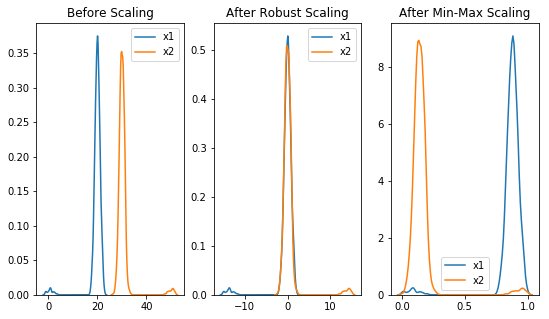

In [29]:
# Create data samples x1, x2
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

# Use RobustScaler
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

# Use MinMaxScaler-- to compare how this performs against the robustscaler
scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

# Plot and visualize
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

Note that after applying RobustScaler, the distributions are brought into the same scale and actually overlap — while the outliers remain outside the bulk of the new distributions. Whereas in MinMaxScaler, the two normal distributions are kept separate by the outliers that are inside the range of 0 and 1.

### Max Absolute Scaler

This method scales each feature by its maximum absolute value.

This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. Thus, the absolute values are mapped in the range [0, 1]. It does not shift/center the data, and thus does not destroy any sparsity.

This scaler can also be applied to sparse matrices.
On positive only data, this scaler behaves similarly to MinMaxScaler and therefore also suffers from the presence of large outliers.

In [47]:
#implementing a maximum absolute scaler 
data = [[-30, 2], [-0.5, 6], [0, -10], [1, 18]]
scaler = preprocessing.MaxAbsScaler()
print(scaler.fit(data))
print(scaler.transform(data))

MaxAbsScaler(copy=True)
[[-1.          0.11111111]
 [-0.01666667  0.33333333]
 [ 0.         -0.55555556]
 [ 0.03333333  1.        ]]


In [73]:
#compare against the min max scaler on the same data
data = [[-30, 2], [-0.5, 6], [0, -10], [1, 18]]
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
#print((((6)-(-10))/(18+10))*(2)-1)
print(scaler.fit(data))
print(scaler.transform(data))

MinMaxScaler(copy=True, feature_range=(-1, 1))
[[-1.         -0.14285714]
 [ 0.90322581  0.14285714]
 [ 0.93548387 -1.        ]
 [ 1.          1.        ]]


### L1, L2 and max Normalization 
These methods normalize samples individually to unit norm.

Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1 or l2) equals one.

This transformer is able to work both with dense numpy arrays and scipy.sparse matrix. The Normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features. Let us assume your features were x, y, and z, your scaled value for x would change according to the normlization technique you change.

For instance if we choose the default l2 normalization, the formula becomes:
![L2 Norm](https://wiki.mu-sigma.com/muwiki/images/f/fc/L2_norm.png)
L2 normalization minimizes the sum of the square of the differences between the target value (x) and the estimated values (x’).

Similarly, for l1 normalization, we minimize the sum of the absolute differences between the target value (x) and the estimated values (x’).
We use this formula for the same: ![L1 norm](https://wiki.mu-sigma.com/muwiki/images/8/8e/L1_norm.png)

The max normalization uses the following formula: Max:  z=max(xi)

In [74]:
from mpl_toolkits.mplot3d import Axes3D

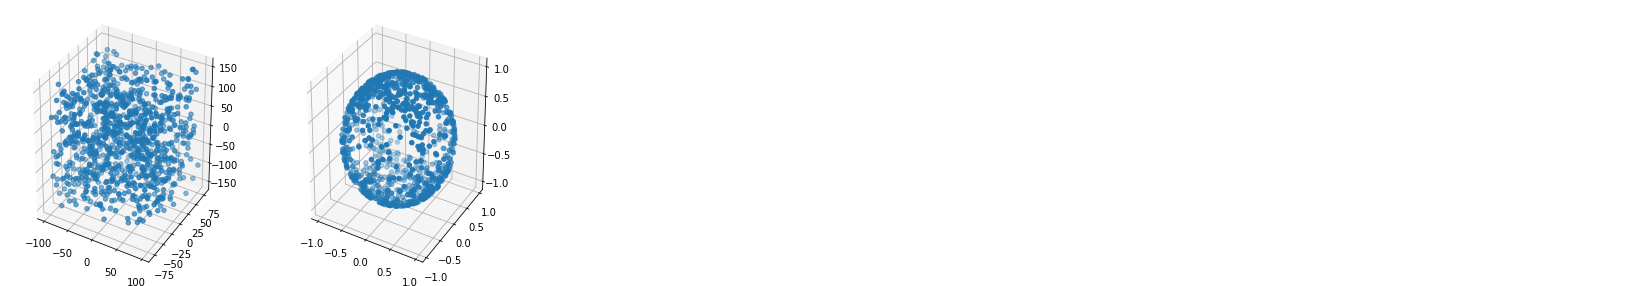

In [75]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = preprocessing.Normalizer() #default norm parameter: 'l2'
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()

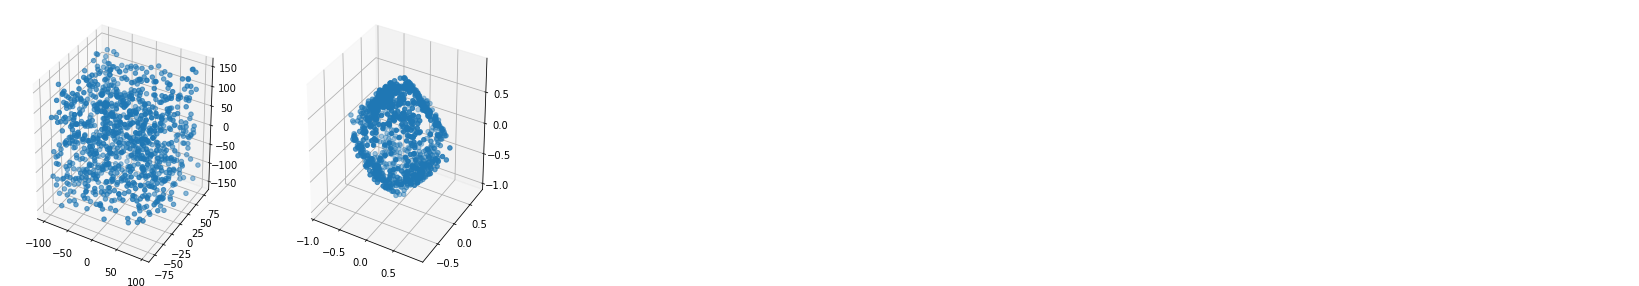

In [76]:
scaler = preprocessing.Normalizer(norm='l1') #norm parameter: 'l1'
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()

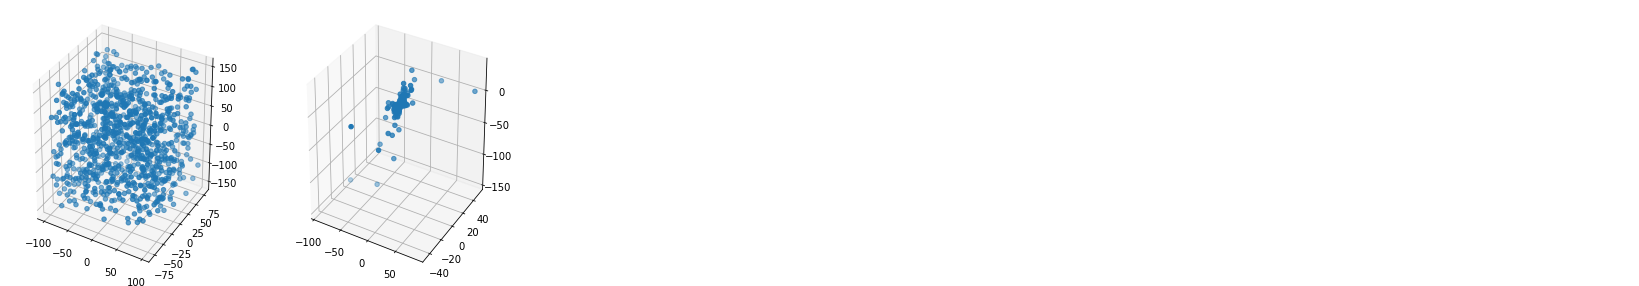

In [77]:
scaler = preprocessing.Normalizer(norm='max') #norm parameter: 'max'
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()

### Quantile Transformation
This method transforms the features to follow a *uniform or a normal distribution*. Using the **output_distribution** argument, you can define the kind of output you desire. There is a difference between uniform and normal (Gaussian) distribution:
![Normal versus Uniform](https://wiki.mu-sigma.com/muwiki/images/3/3e/Uniform_and_normal.png)

Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

The transformation is **applied on each feature independently**. The cumulative distribution function of a feature is used to project the original values. Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. Note that this transform is non-linear. It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable.

The implementation seems to follow this algorithm:

1. calculate empirical ranks, using numpy.percentile
2. modify the ranking through interpolation, using numpy.interp
3. map to a Normal distribution by inverting the CDF, using scipy.stats.norm.ppf
taking care to deal with bounds at the extremities.

In [80]:
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [81]:
dfX = pd.DataFrame(df['Alcohol'])
col = dfX['Alcohol'].values.reshape(-1, 1)

In [83]:
scalers = [
    ('quantile transformation (uniform pdf)', preprocessing.QuantileTransformer(output_distribution='uniform')),
    ('quantile transformation (gaussian pdf)', preprocessing.QuantileTransformer(output_distribution='normal'))
]

for scaler in scalers:
    dfX[scaler[0]] = scaler[1].fit_transform(col)
    
dfX.head()

,Alcohol,quantile transformation (uniform pdf),quantile transformation (gaussian pdf)
0,14.23,0.954397,1.689069
1,13.20,0.570621,0.177957
2,13.16,0.551051,0.128317
3,14.37,0.971886,1.909261
4,13.24,0.584585,0.213636


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


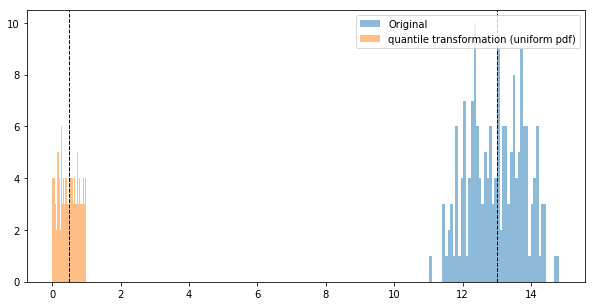

<Figure size 360x360 with 0 Axes>

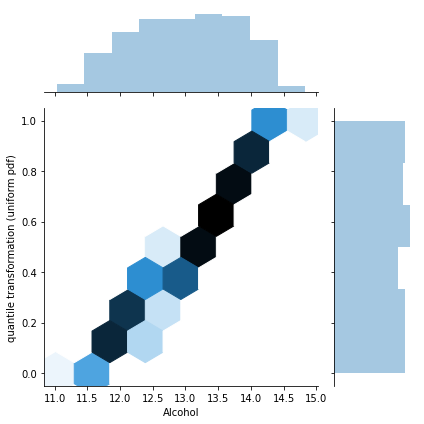

In [84]:
orig = dfX['Alcohol']
orig_mean = orig.mean()
bins = 50
alpha=0.5

def plot_experiment(name):
    normalized = dfX[name]
    plt.figure(figsize=(10,5))
    plt.hist(orig, bins, alpha=alpha, label='Original')
    plt.axvline(orig_mean, color='k', linestyle='dashed', linewidth=1)

    plt.hist(normalized, bins, alpha=alpha, label=name)
    plt.axvline(normalized.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend(loc='upper right')

    plt.figure(figsize=(5,5))
    g = sns.jointplot(x="Alcohol", y=name, data=dfX, kind='hex', ratio=3)
    plt.show()
    
    
plot_experiment('quantile transformation (uniform pdf)')

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


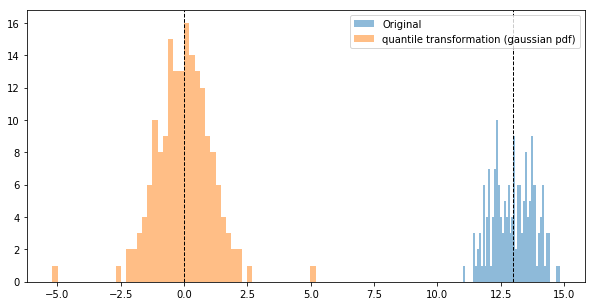

<Figure size 360x360 with 0 Axes>

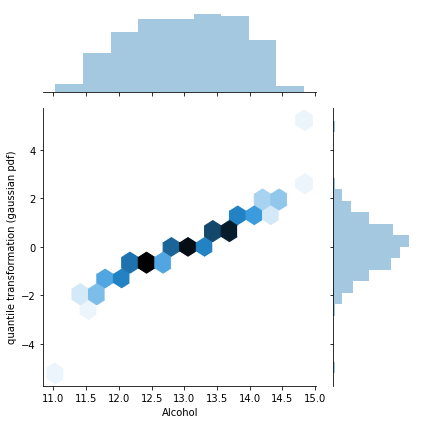

In [85]:
plot_experiment('quantile transformation (gaussian pdf)')

### Power Transformation
Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired. The power transform finds the optimal scaling factor to stabilize variance and mimimize skewness through maximum likelihood estimation.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

#### Box-cox transformation:
The statisticians George Box and David Cox developed a procedure to identify an appropriate exponent (Lambda = l) to use to transform data into a “normal shape.” The Lambda value indicates the power to which all data should be raised. In order to do this, the Box-Cox power transformation searches from Lambda = -5 to Lamba = +5 until the best value is found.
The definition of this transformation is as follows:
![Box Cox](https://wiki.mu-sigma.com/muwiki/images/2/2f/Boxcox.png)

The various results you get from the different values of lambda in Box-Cox transformation are as follows:
![results](https://wiki.mu-sigma.com/muwiki/images/b/b9/Bc_results.png)

#### Yeo Johnson Transformation
ties.
Yeo and Johnson had proposed an new family of distributions that can be used without restrictions on 'y'
that have many of the good properties of the Box-Cox power family. These transformations are defined by:
![Yeo Johnson](https://wiki.mu-sigma.com/muwiki/images/7/75/Yeo_johnson.png)

*Please note: Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.*

By default, zero-mean, unit-variance normalization is applied to the transformed data.

Additional Reading Material:
1. https://www.isixsigma.com/tools-templates/normality/making-data-normal-using-box-cox-power-transformation/
2. https://barnesanalytics.com/box-cox-transforms-and-other-nonparametric-normalization-methods
3. https://www.stat.umn.edu/arc/yjpower.pdf

In [88]:
from sklearn.preprocessing import PowerTransformer

In [89]:
#generate random data in log normal distribution
X_lognormal = np.random.RandomState(616).lognormal(size=(3, 3))

#Yeo Johnson
pt1 = preprocessing.PowerTransformer()#(default=’yeo-johnson’)
pt1.fit_transform(X_lognormal)

#Box Cox
pt2 = preprocessing.PowerTransformer(method='box-cox')
pt2.fit_transform(X_lognormal)

### Standardization (Standard Scaler)
The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:
![Standardization](https://wiki.mu-sigma.com/muwiki/images/f/f1/Standardization.png)

The underlying assumption is that the data distribution is approximately Gaussian.

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


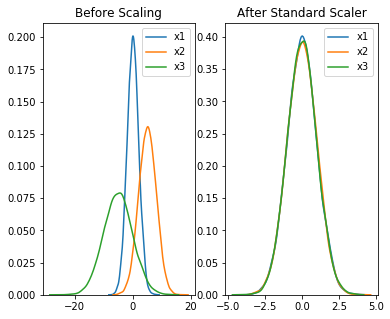

In [90]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

Additional reading material:
1. https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

## Fundamental Data Preprocessing

### Correlation plots

Correlation plots can help you select and eliminate variables from the ADS, simply on the basis of correlations. This will help you eliminate multicollinearity.

**Why do you need to remove collinearity?**
A regression analysis isolates the relationship between each predictor or independent variable (x) and the target/dependent variable (y). In the final equation, a regression coefficient represents the average change caused in the target variable for a unit change in the corresponding independent variable, given that all the other independent variables are constant.
Now in a case, when independent variables are correlated (this condition is multicollinearity), it indicates that changes in one variable would also cause shifts in another variable. The stronger this correlation is, higher would be the difficulty to change one variable without changing another. This makes it difficult for the regression model to estimate the relationship between each independent variable and the dependent variable independently. This basically leads to 3 major problems, which are related to each other:
Unreliable explained variance due to predictors
The coefficients become highly sensitive to small changes in the model and the presence of other independent predictors.
It reduces the precision of the equation coefficients, thus reducing the performance of your regression model (unreliable p-values to determine the statistical significance of the independent variables).

In [ ]:
# Plot the Correlation map to see how features are correlated with target: SalePrice
corr_matrix = df.corr()
#setting a size for the plot
plt.subplots(figsize=(12,9))
#plot a heat map to visualize the correlation map
sns.heatmap(corr_matrix, vmax=0.9, square=True)

## to zoom into the top  most(eg: 10 top most) correlated variables (wrt the target variable)
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Pair Plots
These plots help you investigate the detailed pairwise relationship of multiple variables. 

Examples of pairplots:
![Pair Plots](https://wiki.mu-sigma.com/muwiki/images/a/ad/Pairplots.png)

In [ ]:
#scatterplot
sns.set()
cols = ['']#lists of columns you want to investigate
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

### Outlier Removal
This is a significant step in any ML project. 

A univariate outlier is a data point that consists of an extreme value on one variable. A multivariate outlier is a combination of unusual scores on at least two variables. Both types of outliers can influence the outcome of statistical analyses.
You can detect outliers both in univariate and bivariate analysis. 

We will cover two ways of detecting and treating outliers:
1. Using Visualzations
2. Using Mathematical functions

#### Univariate outlier detection using visualizations
You can use boxplots for this purpose

In [ ]:
import seaborn as sns

# for simple boxplots
sns.boxplot(x=df['col'])

# to get boxplots of values of col1 across different values of col2
bplot = sns.boxplot(y='col1', x='col2', 
                 data=gapminder_2007, 
                 width=0.5,
                 palette="colorblind")

Additional reading material:
1. http://cmdlinetips.com/2018/03/how-to-make-boxplots-in-python-with-pandas-and-seaborn/

#### Bivariate outlier detection using visualizations
Let us use scatter plots for these.

Example plot:
(This is from the House Price prediction dataset on Kaggle)
![example](https://wiki.mu-sigma.com/muwiki/images/6/6a/Out_scatterplot1.png)

In [ ]:
# first variable : GrLivArea against the target variable i.e. SalePrice
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train_df['GrLivArea'], y=train_df['SalePrice'], fit_reg=False).set_title("Before")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)
g = sns.regplot(x=train_df['GrLivArea'], y=train_df['SalePrice'], fit_reg=False).set_title("After")

After the removal of the outliers, the plot looks like the following:
![example](https://wiki.mu-sigma.com/muwiki/images/1/1d/Outscatter2.png)    

#### Outlier detection and removal with IQR-score
Use IQR for the same.

Box plots use the IQR method to display data and outliers(shape of the data). The IQR score also called the midspread or middle 50%, or technically H-spread is a representation of the dispersion of data (similar to standard deviation or variance), but is much more robust against outliers.

Mathematically, it can be defined as:
the difference between 75th and 25th percentiles, or between upper and lower quartiles, 
*IQR = Q3 − Q1*

To detect and remove outliers, use the **1.5 x IQR rule**
It says:
1. anything below Q1 – 1.5 IQR or
2. above Q3 + 1.5 IQR. is an outlier
![IQR](https://wiki.mu-sigma.com/muwiki/images/b/b1/Iqr1.png)

In [12]:
# load a sample dataset
from sklearn.datasets import load_boston

#using the Boston pricing dataset
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
print(boston_df.shape)


Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

(506, 13)
CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


The result is the IQR score for each column. To use this score to etect ouliers, see next cell.

In [10]:
print(boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False  False  False  False  False  False  False  False  False  False   

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [11]:
# remove the aove outliers
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(274, 13)

**You can also check this out**

You can also use the z-score to compare a distribution against a thresold value to detect and remove the outliers.
Reading Material: https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32

### Transformation of target variables

This step is important to ensure that the **model predictions are more accurate and reliable**. 

In regression algorithms, it is necessary that **the residuals follow a normal distribution**. Just to revise the definition of residuals, it is defined as the difference between the observed value of the dependent/target variable (y) and the predicted value (ŷ).

One obvious question that now arises is on the need of normal residuals. To answer that, let’s try to simplify the mathematical logic behind the exercise:

The non-normality in the residuals and heteroscedasticity ( the property that the variability of a variable is not equal across the range of values of another variable that is used to predict it.) poses a major problem. It basically says that the amount of error in a model is not consistent across the full range of the observed or training data. In terms of the independent or predictor variables, this means that the amount of explained variance (or predictive ability) they have (as calculated in their beta weights) is not the same across the full range of the target variable. Essentially the predictors would explain difference trends and variances at different levels of the response variable. In alternate terms, when the residuals are not normally distributed, then the hypothesis that they are a random data-set, takes the value ‘no’. This means that the model does not explain all trends in the data-set (low R-square value). This most definitely reduces the reliability of the test predictions.

We can correct this by transforming the dependent variable. Now, if the predicted values are normally distributed then the residuals are as well, and vice versa. 

*Some of the common transformation variables are: 1. Logarithmic, 2. Square Root, 3. Inverse (1/x). There can be several other functions or transformations that you can use on the basis of the observed trend of the response variable.*


In [ ]:
# basic states of 'SalePrice'
df['SalePrice'].describe()

#distribution plot- histogram
sns.distplot(df['SalePrice']).set_title("Distribution of SalePrice")

# probability plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

![result](https://wiki.mu-sigma.com/muwiki/images/d/d2/Target_var1.png)

We see a positive skewness. This is not exactly a normal distribution. Also, the balues do not follow the linear trend here.
Now, if we observe a positive or a right skewness, log transformation is a good option

Why log?
The non-linear trend shows 'SalePrice' has some sort of exponential relationship with the independent variables. Applying a log function on these values should give a linear trend and convert the set of values into 'normally distributed' values.

Furthermore, for this problem, "submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)"

All this would just make sense if we replace the values in 'SalePrice' column by the corresponding log values

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

![result](https://wiki.mu-sigma.com/muwiki/images/7/76/Sample2.png)

*Please note:
The above activity was a subset of what you would do under feature scaling. If you are transforming the target variable using the method above, you should ideally do the same with your independent variables too. However, if you do not have the liberty to scale all features, kindly ensure you do so at least for the independent variables that have significantly high correlation with the target variable as they would explain the most variance in the target variable.*

## Treatment of categorical and ordinal variables

In many practical Data Science activities, the data set will contain categorical variables. These variables are typically stored as text values which represent various traits. Some examples include color (“Red”, “Yellow”, “Blue”), size (“Small”, “Medium”, “Large”) or geographic designations (State or Country). Regardless of what the value is used for, the challenge is determining how to use this data in the analysis. Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. Therefore, the analyst is faced with the challenge of figuring out how to turn these text attributes into numerical values for further processing.

In ML models we are often required to convert the categorical i.e text features or ordinal (eg: High, Medium and Low) features to its numeric representation. The two most common ways to do this is to use Label Encoder or OneHot Encoder.

#### Label Encoder
An approach to encoding categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number. In other words, Label Encoding gives numerical aliases to different classes. This algorithm however, assumes that there is an ordered / ordinal relationship between the multiple classes in the variable. For instance, in a column talking about size with values: 'small', 'medium' and 'large' can be represented as **small<medium<large**. Hence, using the Label Encoder one can represent 'small' as 0, 'medium' as 1 and 'large' as 2 where **0<1<2**.

Label Encoding in Python can be achieved using Sklearn Library. Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [91]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# create a list of ordinal variables
ordinal_variables=['abc',''...]

# label encoder
le = preprocessing.LabelEncoder()

#apply the label encoder to all ordinal columns of dataframe 'df'
for c in ordinal_variables:
    le.fit(df[c])
    df[c] = le.transform(df[c])


#### One Hot Encoding
An alternative approach of representing textual columns as numerics is called one hot encoding. One-Hot Encoding transforms each categorical feature with n possible values into n binary features, with only one active for a given datapoint.

Most of the ML algorithms either learn a single weight for each feature or compute distances between the samples. Algorithms like linear models (such as logistic regression) belongs to the first category. It basically converts each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

In [ ]:
################################ implementation using PANDAS: get_dummies#########################################

# create a list of categorical columns for one hot encoding
cat_variables= ['']

# One-Hot encoding to convert categorical columns to numeric
print('start one-hot encoding')

df = pd.get_dummies(df, prefix = cat_variables,
                         columns = cat_variables)

print('one-hot encoding done')

In [ ]:
################################### implementation using SKLEARN: OneHotEncoder###################################

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(n_values= 'auto',categorical_features = ['indices of categorcal features (default value is all)'])
x = onehotencoder.fit_transform(x).toarray()

Package documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

### Bonus:
#### Additional techniques for categorical encoding:

1. Custom Binary Encoding
Say you have 4 values in a column called 'engine_type':
A. '4 cyl petrol'
B. '3 cyl petrol'
C. '4 cyl diesel'
D. '3 cyl diesel'

You want to encode this column as a binary variable 'diesel engine'-- where in the two diesel engine variants get clubbed as 1 and the other two (petrol variants) as 0

``` python
df["diesel_engine"] = np.where(df["engine_type"].str.contains("diesel"), 1, other=0)
```

2. Backward Difference encoding
Here, the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level. This type of coding may be useful for a *nominal or an ordinal variable.*

3. Polynomial Encoding
The coefficients taken on by polynomial coding for k=4 levels are the linear, quadratic, and cubic trends in the categorical variable. The categorical variable here is assumed to be represented by an underlying, equally spaced numeric variable. Therefore, this type of encoding is used only for *ordered categorical variables with equal spacing.*

4. Helmert Encoding
The mean of the dependent variable for a level is compared to the mean of the dependent variable over all previous levels. Hence, the name ‘reverse’ being sometimes applied to differentiate from forward Helmert coding.

References and additional reading material:
1. https://pbpython.com/categorical-encoding.html
2. https://www.kdnuggets.com/2015/12/beyond-one-hot-exploration-categorical-variables.html

## Dealing with imbalanced data

Often in practical machine learning problems there will be significant differences in the rarity of different classes of data being predicted. For example, when detecting cancer we can expect to have datasets with large numbers of false outcomes, and a relatively smaller number of true outcomes.

The overall performance of any model trained on such data will be constrained by its ability to predict rare points.The main motivation behind the need to preprocess imbalanced data before we feed them into a classifier is that typically classifiers are more sensitive to detecting the majority class and less sensitive to the minority class. Thus, if we don't take care of the issue, the classification output will be biased, in many cases resulting in always predicting the majority class. Many methods have been proposed in the past few years to deal with imbalanced data. 

The most naive class of techniques is sampling: changing the data presented to the model by undersampling common classes, oversampling (duplicating) rare classes, or both.

### Oversampling
This method uses synthetic data generation to increase the number of samples in the data set. The goal is to **increase the minority class so that the data set becomes balanced by creating synthetic observations based upon the existing minority observations.**

There are three key ways/ algorithms for oversampling the minority class:
1. Random Oversampling- Random oversampling simply replicates randomly the minority class examples. Random oversampling is known to increase the likelihood of occurring overfitting.

2. SMOTE (Synthetic Minority Oversampling Technique)- This method generates synthetic data based on the feature space similarities between existing minority instances. In order to create a synthetic instance, it finds the K-nearest neighbors of each minority instance, randomly selects one of them, and then calculate linear interpolations to produce a new minority instance in the neighborhood.

3. ADASYN (Adaptive Synthetic Sampling)- ADASYN generates samples of the minority class according to their density distributions. More synthetic data is generated for minority class samples that are harder to learn, compared to those minority samples that are easier to learn. It calculates the K-nearest neighbors of each minority instance, then gets the class ratio of the minority and majority instances to generate new samples. By repeating this process, it adaptively shifts the decision boundary to focus on those samples that are difficult to learn.

In [1]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

from sklearn.datasets import make_classification

import seaborn as sns

#### Random Sampling

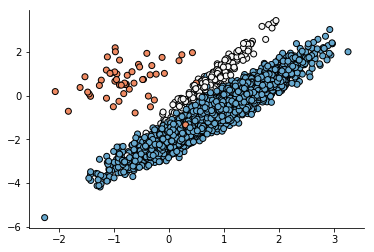

In [4]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig = plt.Figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()

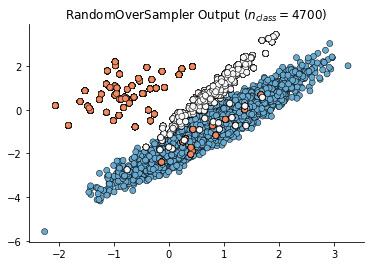

In [5]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomOverSampler Output ($n_{class}=4700)$")
pass

#### SMOTE
**imblearn** includes several adaptations of the naive SMOTE algorithm which attempt to address this weakness in various ways. There are in total four "modes" in imblearn. The one demonstrated thus far, the classic SMOTE algorithm, corresponds with kind='regular'. The remaining three are adaptations.

kind='borderline1' and kind='borderline2' are one class of adaptations. These will classify points are being noise (all nearest neighbors are of a different class), in danger (half or more nearest neighbors are a different class), or safe (all nearest neighbors are of the same class). Only points in danger will be sampled in step one of the algorithm. Then, on step two of the algorithm, instead of selecting a point from n_neighbors belonging to the same class, borderline1 will select a point from the five nearest points not belonging to the given point's class, while borderline2 will select a point from the five nearest points of any class.

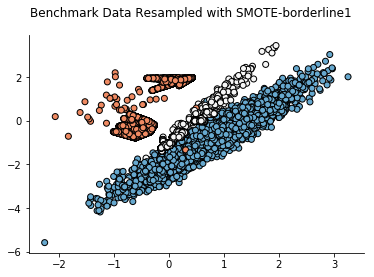

In [6]:
X_resampled, y_resampled = SMOTE(kind='borderline1').fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE-borderline1")
pass

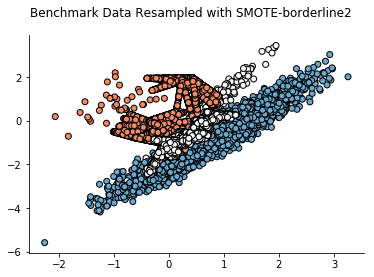

In [7]:
X_resampled, y_resampled = SMOTE(kind='borderline2').fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE-borderline2")
pass

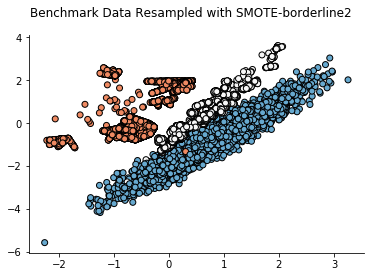

In [8]:
X_resampled, y_resampled = SMOTE(kind='svm').fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE-borderline2")
pass

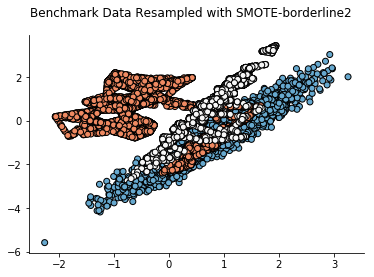

In [9]:
X_resampled, y_resampled = SMOTE(kind='regular').fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE-borderline2")
pass

#### ADASYN
The other oversampling technique implemented in imlearn is adaptive synthetic sampling, or ADASYN. ADASYN is similar to SMOTE, and derived from it, featuring just one important difference. it will bias the sample space (that is, the likelihood that any particular point will be chosen for duping) towards points which are located not in homogenous neighborhoods.

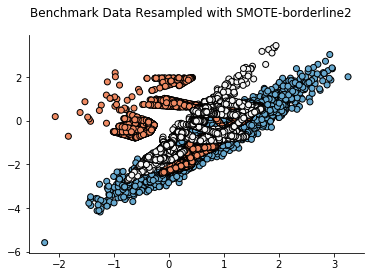

In [10]:
X_resampled, y_resampled = ADASYN().fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE-borderline2")
pass

ADASYN uses (1) the kind='normal' SMOTE algorithm (2) on point not in homogenous neighborhoods. The result is a kind of hybrid between regular SMOTE and borderline1 SMOTE. This technique inherits the primary weakness of SMOTE, e.g. its ability to create innerpoint-outerpoint bridges. Whether or not the heavy focus on the outlier points is a good thing or not is application dependent, but overall ADASYN feels like a very heavy transformation algorithm, and e.g. one requiring that the underlying point cluster be sufficiently large, as imblearn doesn't provide any modifications to this algorithm for modulating its tendency to create them (as it does for SMOTE).


The key idea of ADASYN algorithm is to use a density distribution rˆi as a criterion to automatically decide the
number of synthetic samples that need to be generated for each minority data example. Physically, rˆi is a measurement of the distribution of weights for different minority class examples according to their level of difficulty in learning. The resulting dataset post ADASYN will not only provide a balanced representation of the data distribution (according to the desired balance level defined by the β coefficient), but it will also force the learning algorithm to focus on those difficult to learn examples. This is a major difference compared to the SMOTE algorithm, in which equal numbers of synthetic samples are generated for each minority data example.

References:
1. https://www.kaggle.com/residentmario/oversampling-with-smote-and-adasyn
2. https://www.kaggle.com/residentmario/undersampling-and-oversampling-imbalanced-data/
3. https://medium.com/coinmonks/smote-and-adasyn-handling-imbalanced-data-set-34f5223e167
4. http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf

### Undersampling
One of the most common and simplest strategies to handle imbalanced data is to undersample the majority class. However, it is not suggested to undersample as it may lead to loss of information. 

Three ways of undersampling are:
1. Random Undersampler- Like randomoversampler, randomundersampler also has a random logic to remove datapoints. This however, can cost you great deal of information. 

2. Tomek Links- Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Tomek links remove unwanted overlap between classes where majority class links are removed until all minimally distanced nearest neighbor pairs are of the same class. A Tomek link is defined as follows: given an instance pair {(x_{i},x_{j})}, where {x_{i}} belongs to *minority class* and {x_{j}} belongs to *majority class*. If d(x_{i},x_{j})} is the distance between x_{i} and x_{j}, then the pair (x_{i},x_{j}) is called a **Tomek link** if there's no instance x_{k} such that d(x_{i},x_{k})<d(x_{i},x_{j})} or d(x_{j},x_{k})<d(x_{i},x_{j}). In this way, if two instances form a Tomek link then either one of these instances is noise or both are near a border. Thus, one can use Tomek links to clean up overlap between classes. By removing overlapping examples, one can establish well-defined clusters in the training set and lead to improved classification performance.

3. Using cluster centroids- Cluster centroids is a method that replaces cluster of samples by the cluster centroid of a K-means algorithm, where the number of clusters is set by the level of undersampling. This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in order to preserve information.

In [11]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids

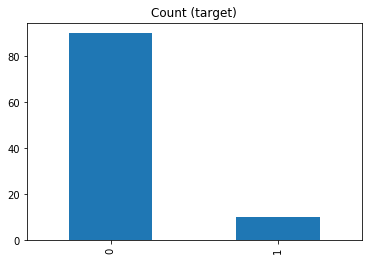

In [14]:
X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)');

In [16]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

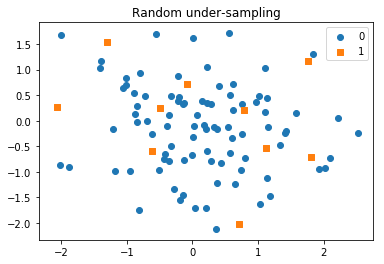

In [18]:
plot_2d_space(X, y, 'Random under-sampling')

#### Random Under Sampling

Removed indexes: [91 96 94 82 27 47 86 12 17  3  4  8  9 14 16 40 67 70 71 74]


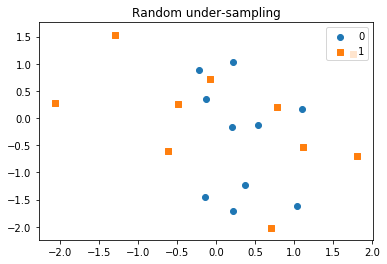

In [17]:
rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

#### Tomek Links

Removed indexes: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


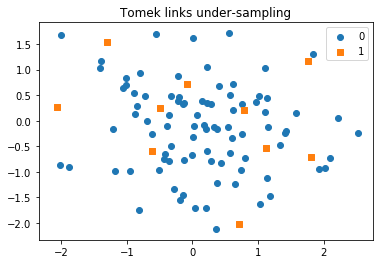

In [19]:
tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

#### Cluster centroid Sampling

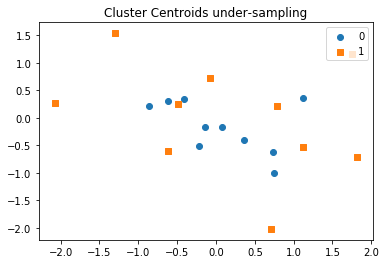

In [20]:
cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

Reference:
1. https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets